Import libraries

In [2]:
from wptherml.wpml import multilayer
from matplotlib import pyplot as plt
from wptherml.datalib import datalib
import numpy as np


Let's look at the Bragg Reflector structure considered for the Extrinsic Plasmon system:

In [3]:
d1 = 500e-9/(4*1.50)
d2 = 500e-9/(4*2.4)

ep_structure = {
        'Temperature': 300,
        ### actual materials the structure is made from
        ### values are stored in the attribute self.n
        'Material_List': ['Air', 'SiO2','TiO2','SiO2','TiO2', 'SiO2','TiO2', 'SiO2','TiO2','SiO2','TiO2','SiO2','TiO2','SiO2','TiO2',  'Air'],
        ### thickness of each layer... terminal layers must be set to zero
        ### values are stored in attribute self.d
        'Thickness_List': [0, d1, d2, d1, d2, d1, d2, d1, d2,d1, d2,d1, d2,d1, d2,  0],
         ### range of wavelengths optical properties will be calculated for
         ### values are stored in the array self.lam
        'Lambda_List': [500e-9, 700e-9, 201]
        }

ep = multilayer(ep_structure)

  Gradient will be taken with respect to all layers! 


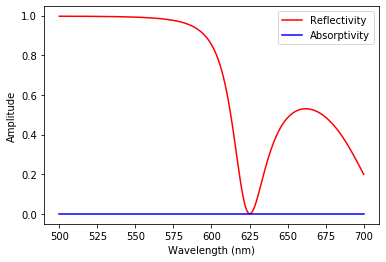

In [4]:
plt.plot(ep.lambda_array*1e9, ep.reflectivity_array, 'red', label='Reflectivity')
plt.plot(ep.lambda_array*1e9, ep.emissivity_array, 'blue', label='Absorptivity')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

And given that the zero crossing of the effective epsilon occurs around $\lambda \approx 606 nm$, let's also look at the angle-dependant reflectivity at that wavelength:

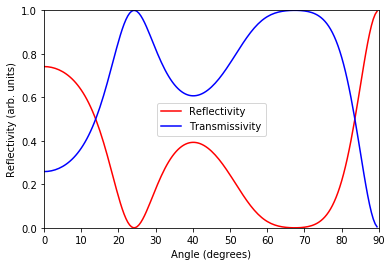

In [6]:
ep.angular_fresnel(606e-9)
plt.plot(180/np.pi*ep.theta_array, ep.r_vs_theta, 'red', label='Reflectivity')
plt.plot(180/np.pi*ep.theta_array, ep.t_vs_theta, 'blue', label='Transmissivity')

plt.xlabel('Angle (degrees)')
plt.ylabel("Reflectivity (arb. units)")
plt.xlim(0,90)
plt.ylim(0,1)
plt.legend()
plt.show()

Now we will try to do this with the effective material.

  Gradient will be taken with respect to all layers! 


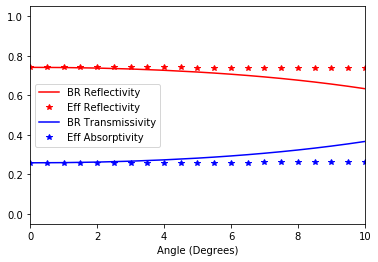

In [17]:
dtot = 7*d1 + 7*d2
eff_eps_structure_606 = {
        'Temperature': 300,
        'Material_List': ['Air', 'SiO2', 'Air'],
        'Thickness_List': [0, dtot, 0],
        'Lambda_List': [500e-9, 700e-9, 201]
        }
### initialize multilayer
eff_606 = multilayer(eff_eps_structure_606)

### define the RI to have the value inferred from the previous fitting routine:
eff_606.layer_static_ri(1,7.149095890716119+6.6485645591327245*1j)
### compute the reflectance of this effective-medium slab
eff_606.fresnel()
eff_606.angular_fresnel(606e-9)
### plot vs the angular reflectivity of the actual BR at 606 nm
plt.plot(180/np.pi*ep.theta_array, ep.r_vs_theta, 'red', label='BR Reflectivity')
plt.plot(180/np.pi*eff_606.theta_array, eff_606.r_vs_theta, 'r*', label='Eff Reflectivity')
plt.plot(180/np.pi*ep.theta_array, ep.t_vs_theta, 'blue', label='BR Transmissivity')
plt.plot(180/np.pi*eff_606.theta_array, eff_606.eps_vs_theta, 'b*', label='Eff Absorptivity')
plt.xlabel("Angle (Degrees)")
plt.legend()
plt.xlim(0,10)
plt.show()





It appears that the effective RI nails the 